# ECE 228 Unet (mitochondria dataset)

# Python Imports

In [1]:
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
%matplotlib inline  

import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms, utils
from skimage import io, transform
from skimage.color import rgb2gray

from models import * 
from train import *




# Load Mitochondria Data

/datasets/home/89/189/ltindall/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Train imgs shape =  (20, 1, 512, 512)
Validation imgs shape =  (10, 1, 512, 512)
Test imgs shape =  (5, 1, 1024, 1024)


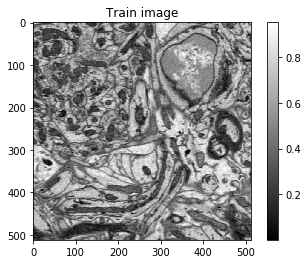

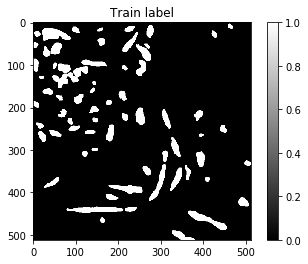

In [2]:
mito_dir = './datasets/mitochondria/'

def import_mito(mito_dir): 
    
    mito_train_img_dir = mito_dir+'training/images/'
    mito_train_lbl_dir = mito_dir+'training/labels/'   
    mito_val_img_dir = mito_dir+'validation/images/'
    mito_val_lbl_dir = mito_dir+'validation/labels/'
    mito_test_img_dir = mito_dir+'testset/'

    # load train imgs and labels 
    mito_train_imgs = import_dir(mito_train_img_dir)
    mito_train_lbls = import_dir(mito_train_lbl_dir)
   
    # convert train labels to binary mask
    mito_train_lbls_gray = []
    for img in mito_train_lbls:
        mito_train_lbls_gray.append(rgb2gray(img))
    mito_train_lbls = np.array(mito_train_lbls_gray)
    mito_train_lbls[mito_train_lbls!=0]=1
    
    # load validation imgs and labels 
    mito_val_imgs = import_dir(mito_val_img_dir)
    mito_val_lbls = import_dir(mito_val_lbl_dir)
    
    # convert validation labels to binary masks 
    mito_val_lbls_gray = []
    for img in mito_val_lbls:
        mito_val_lbls_gray.append(rgb2gray(img))
    mito_val_lbls = np.array(mito_val_lbls_gray)
    mito_val_lbls[mito_val_lbls!=0]=1
    
    # load test imgs 
    mito_test_imgs = import_dir(mito_test_img_dir)
    
    
    return mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, mito_test_imgs

def import_dir(dirn): 
    
    files = [f for f in os.listdir(dirn) if os.path.isfile(os.path.join(dirn, f))]
    files.sort()
    
    imgs = []
    for f in files: 
        imgs.append(plt.imread(dirn+f))
    return np.array(imgs)
    


mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, mito_test_imgs = import_mito(mito_dir)


resize_size = 512
mito_train_imgs_resized = []
mito_train_lbls_resized = []
mito_val_imgs_resized = []
mito_val_lbls_resized = []
for (img,lbl) in zip(mito_train_imgs, mito_train_lbls): 
    mito_train_imgs_resized.append(transform.resize(img,(resize_size,resize_size)))
    mito_train_lbls_resized.append(transform.resize(lbl,(resize_size,resize_size)))
for (img,lbl) in zip(mito_val_imgs, mito_val_lbls): 
    mito_val_imgs_resized.append(transform.resize(img,(resize_size,resize_size)))
    mito_val_lbls_resized.append(transform.resize(lbl,(resize_size,resize_size)))
    
mito_train_imgs = np.array(mito_train_imgs_resized)
mito_train_lbls = np.array(mito_train_lbls_resized)

mito_val_imgs = np.array(mito_val_imgs_resized)
mito_val_lbls = np.array(mito_val_lbls_resized)


    
mito_train_imgs = np.expand_dims(mito_train_imgs, axis=1)
mito_train_lbls = np.expand_dims(mito_train_lbls, axis=1)
mito_val_imgs = np.expand_dims(mito_val_imgs, axis=1)
mito_val_lbls = np.expand_dims(mito_val_lbls, axis=1)
mito_test_imgs = np.expand_dims(mito_test_imgs, axis=1)

print("Train imgs shape = ",mito_train_imgs.shape)
print("Validation imgs shape = ",mito_val_imgs.shape)
print("Test imgs shape = ",mito_test_imgs.shape)

plt.imshow(np.squeeze(mito_train_imgs[0]), cmap="gray")
plt.title("Train image")
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(mito_train_lbls[0]), cmap="gray")
plt.title("Train label")
plt.colorbar()
plt.show()

# Run Training 

GPU is enabled 
epoch: 0, train loss: 0.3462037853896618


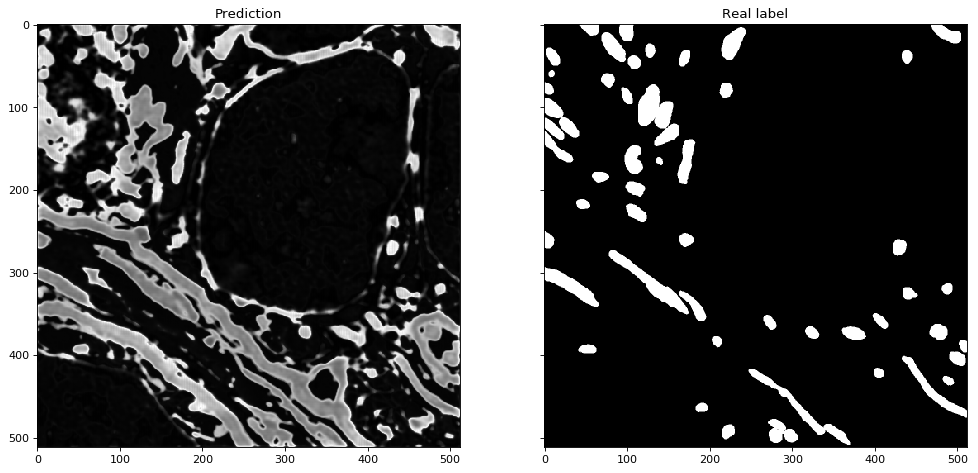

Network evaluation at epoch: 0 

train_avg_loss = 0.1897, train_avg_f1_score = 0.4371 
train_avg_precision = 0.2829, train_avg_recall = 0.9643 

val_avg_loss = 0.1729, val_avg_f1_score = 0.4285 
val_avg_precision = 0.2740, val_avg_recall = 0.9864 


epoch: 1, train loss: 0.16495660468935966


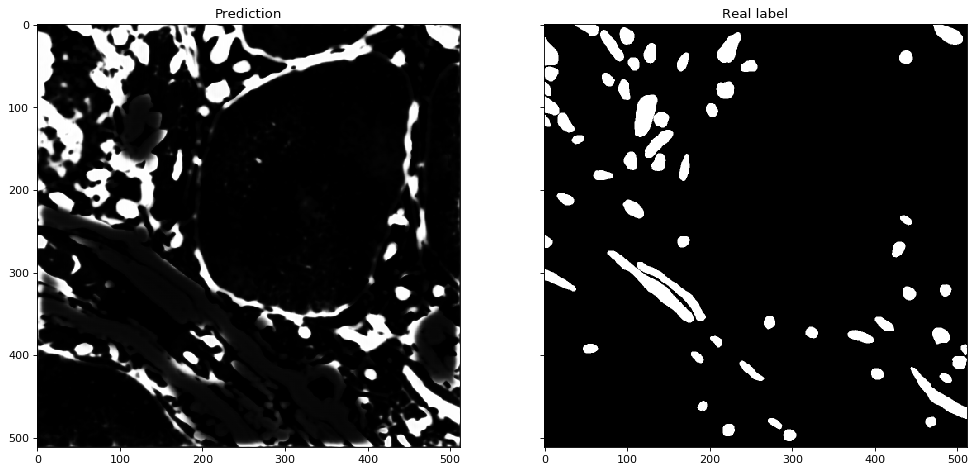

epoch: 2, train loss: 0.15912201404571533


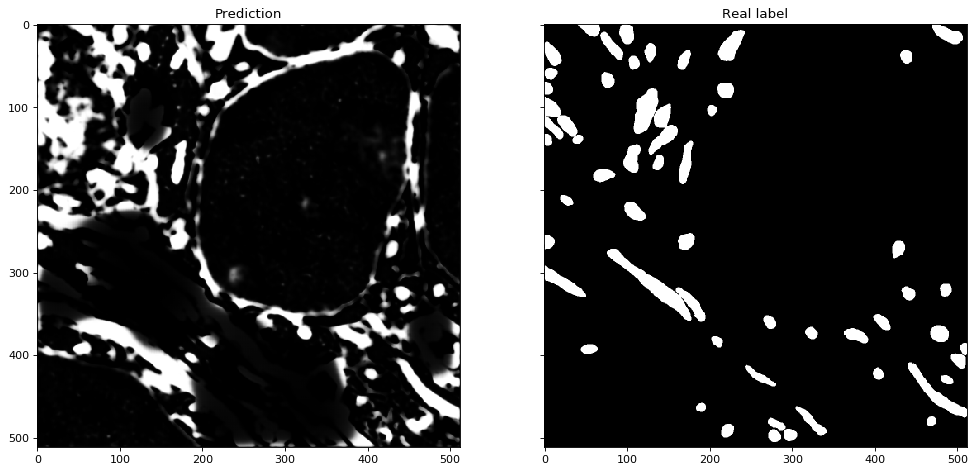

epoch: 3, train loss: 0.15446550101041795


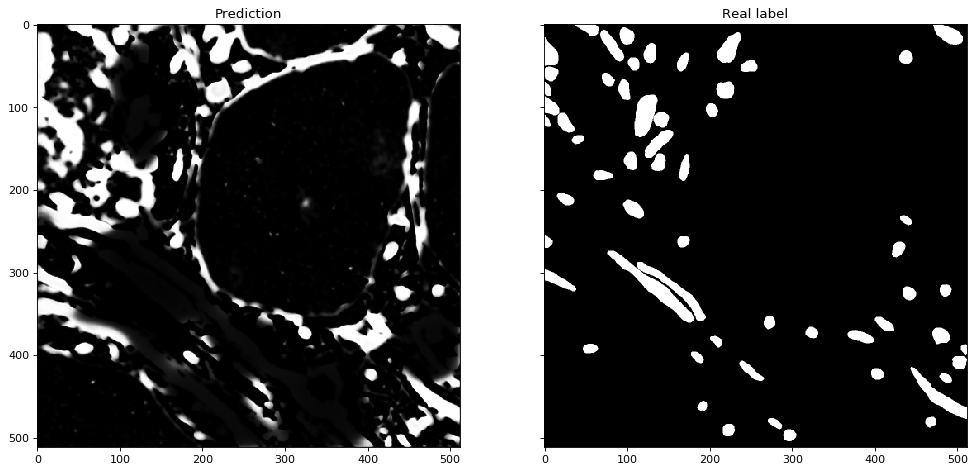

epoch: 4, train loss: 0.15265070870518685


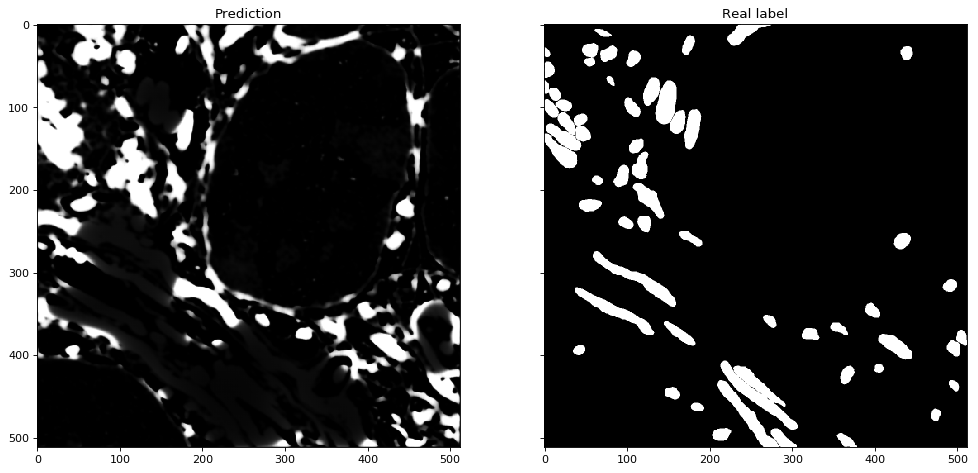

epoch: 5, train loss: 0.1559532769024372


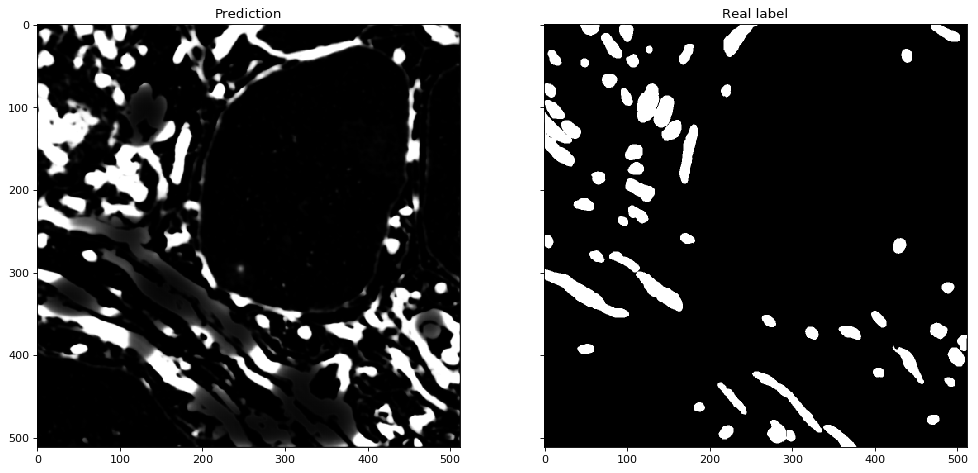

epoch: 6, train loss: 0.14454721212387084


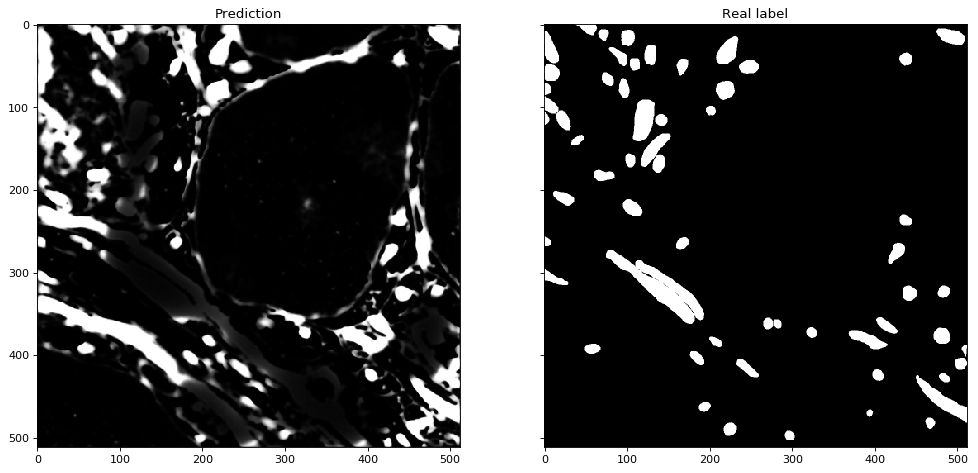

epoch: 7, train loss: 0.1374693900346756


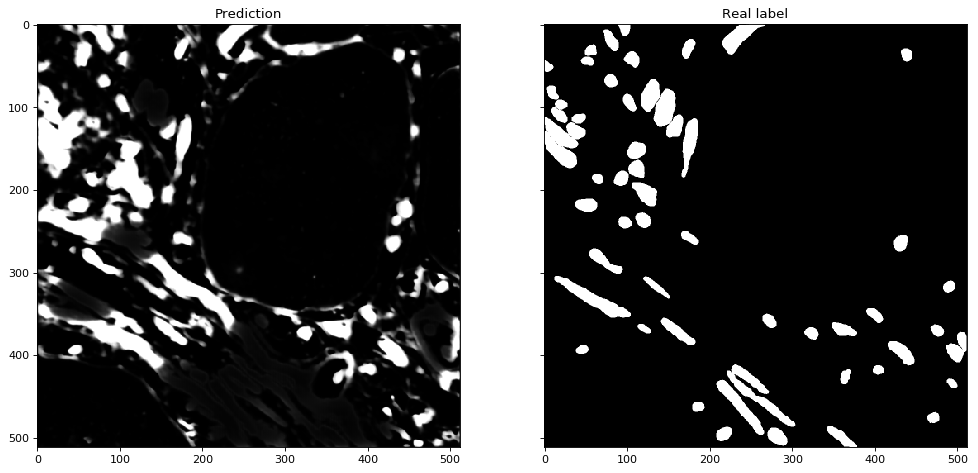

epoch: 8, train loss: 0.13185302317142486


epoch: 9, train loss: 0.13832047805190087


epoch: 10, train loss: 0.12740868404507638


Network evaluation at epoch: 10 

train_avg_loss = 0.1260, train_avg_f1_score = 0.6307 
train_avg_precision = 0.4726, train_avg_recall = 0.9542 

val_avg_loss = 0.1810, val_avg_f1_score = 0.4584 
val_avg_precision = 0.3455, val_avg_recall = 0.6850 


epoch: 11, train loss: 0.11720647625625133


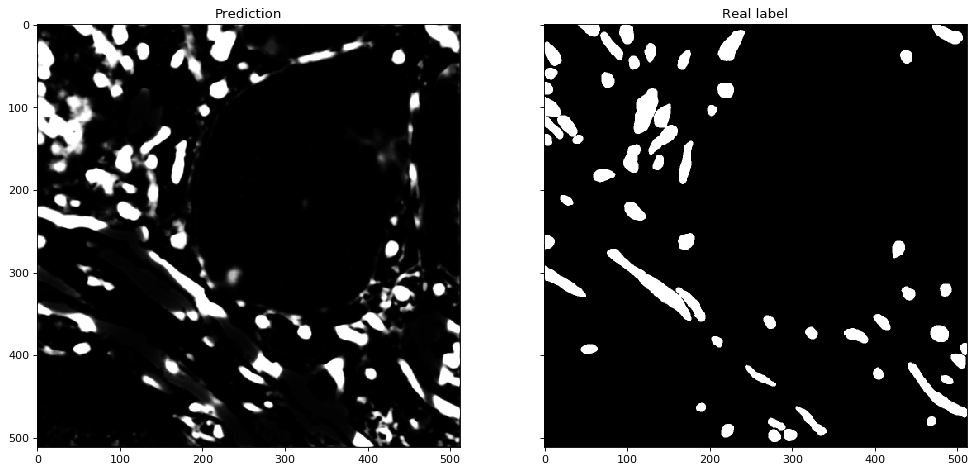

epoch: 12, train loss: 0.11220193840563297


epoch: 13, train loss: 0.10681454986333846


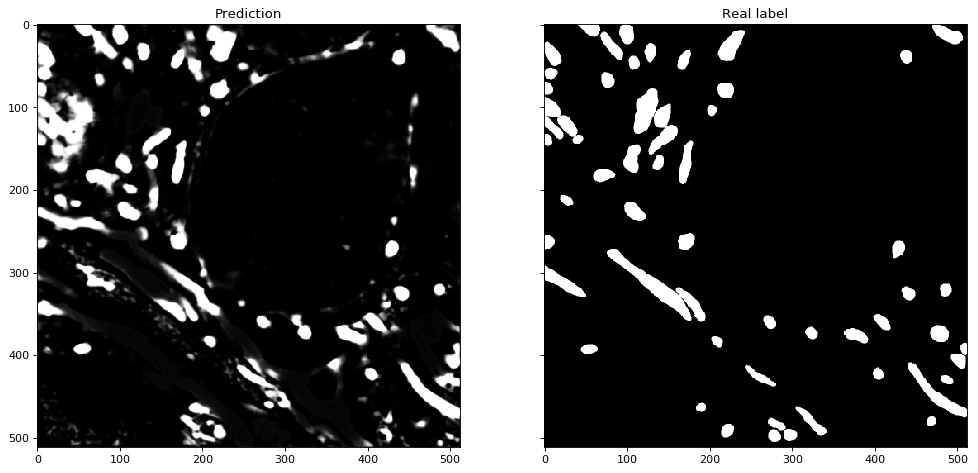

epoch: 14, train loss: 0.10149324536323548


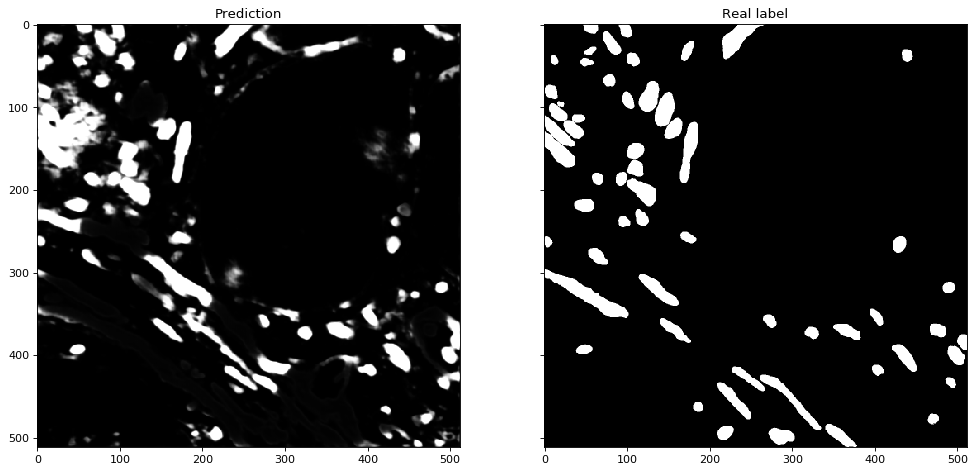

epoch: 15, train loss: 0.09640925005078316


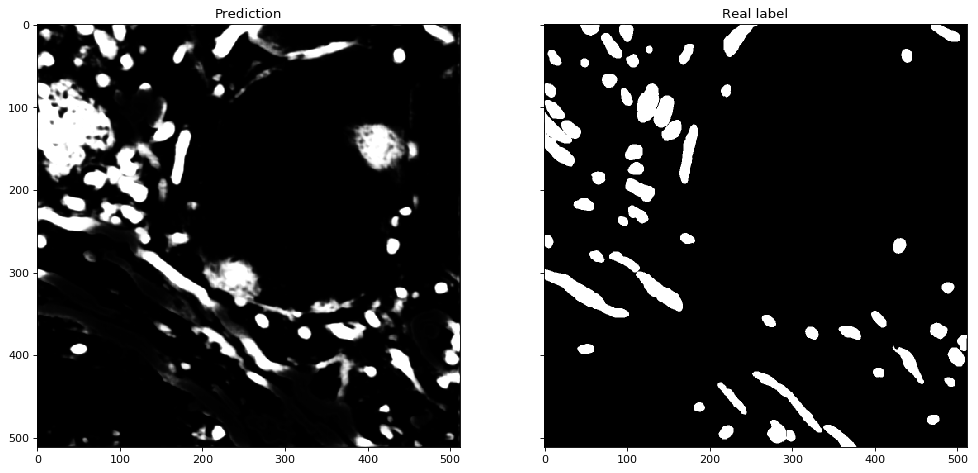

epoch: 16, train loss: 0.09653201885521412


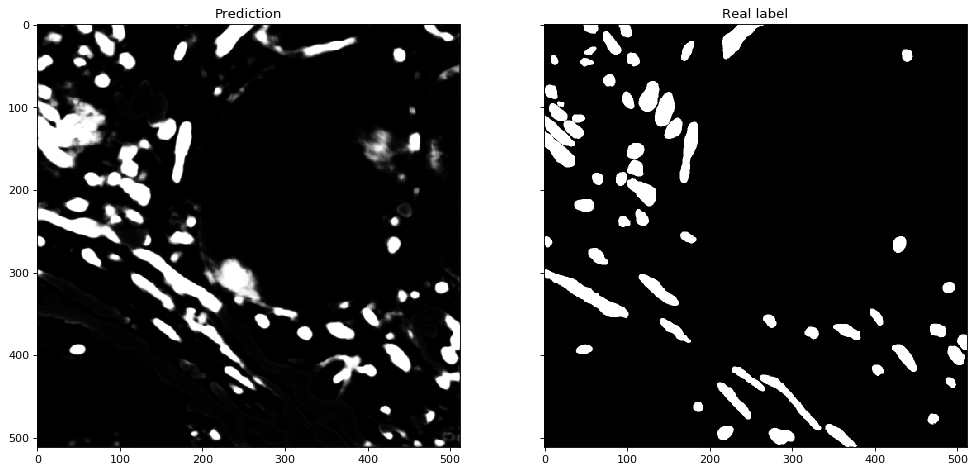

epoch: 17, train loss: 0.09405904412269592


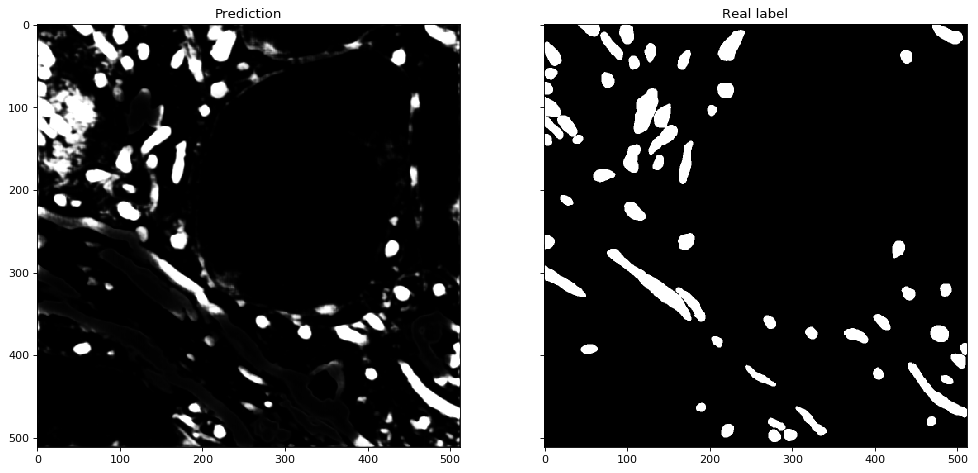

epoch: 18, train loss: 0.09025221429765225


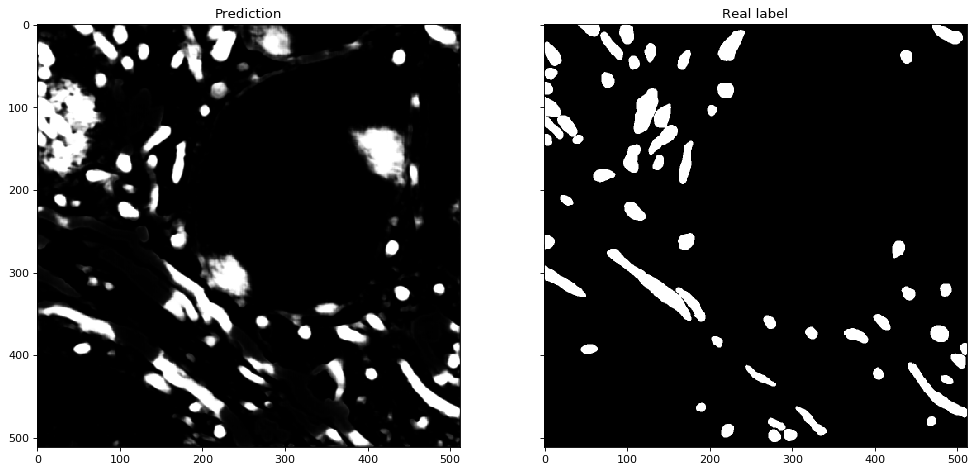

epoch: 19, train loss: 0.08821740932762623


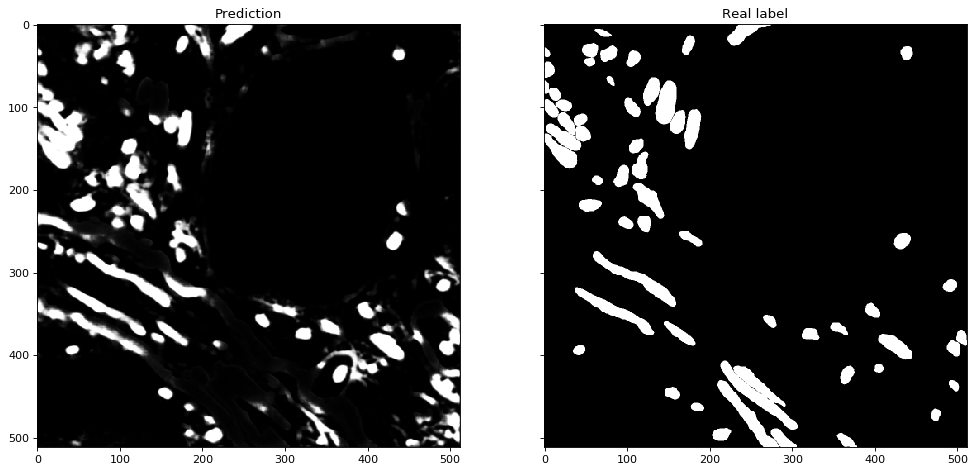

epoch: 20, train loss: 0.08433582372963429


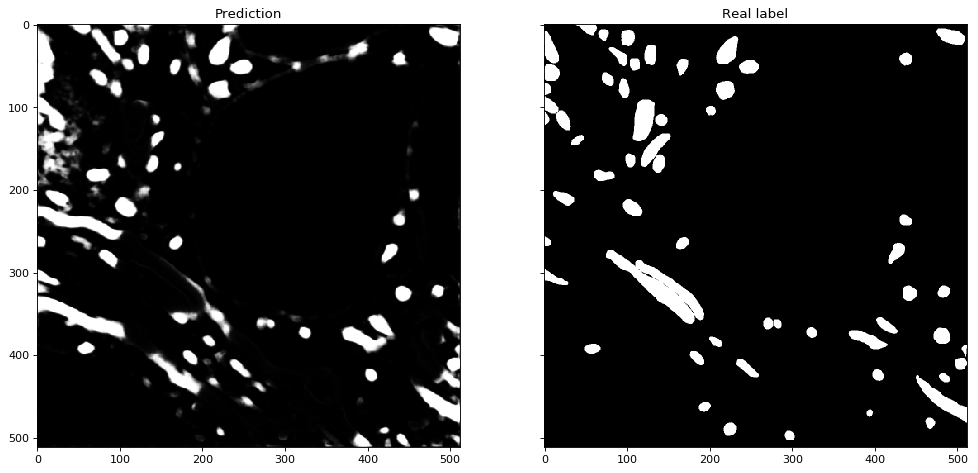

Network evaluation at epoch: 20 

train_avg_loss = 0.0820, train_avg_f1_score = 0.7622 
train_avg_precision = 0.6296, train_avg_recall = 0.9684 

val_avg_loss = 0.1822, val_avg_f1_score = 0.5567 
val_avg_precision = 0.4601, val_avg_recall = 0.7083 


epoch: 21, train loss: 0.08132507912814617


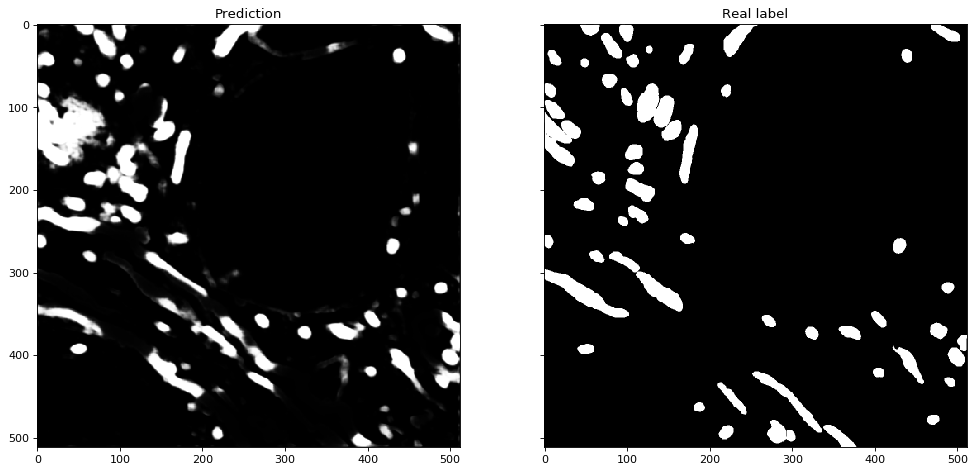

epoch: 22, train loss: 0.07895917482674122


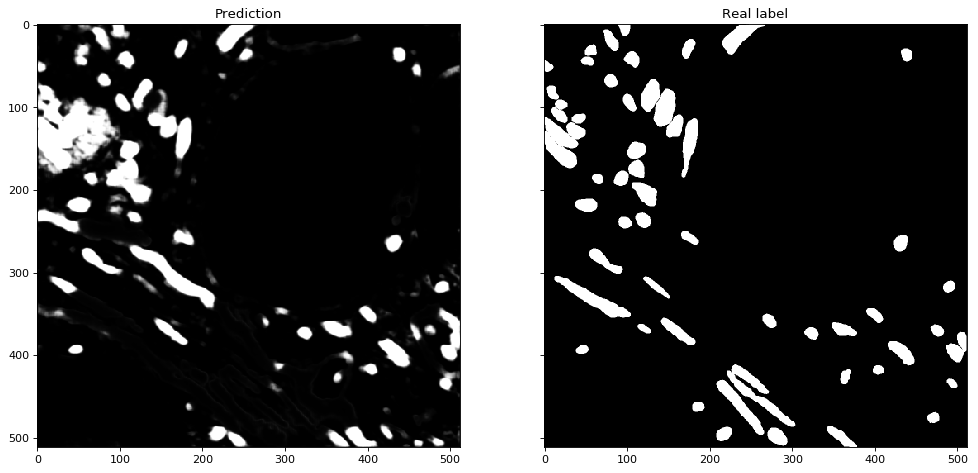

epoch: 23, train loss: 0.08201762475073338


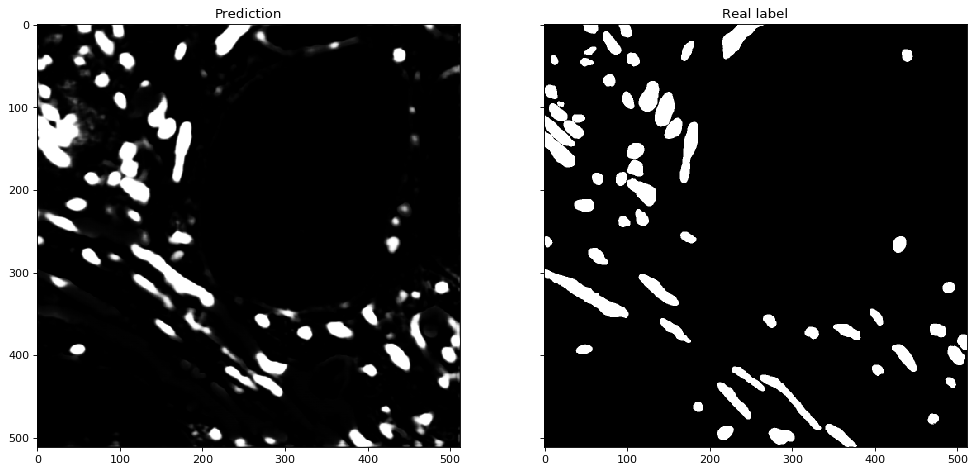

epoch: 24, train loss: 0.07759066037833691


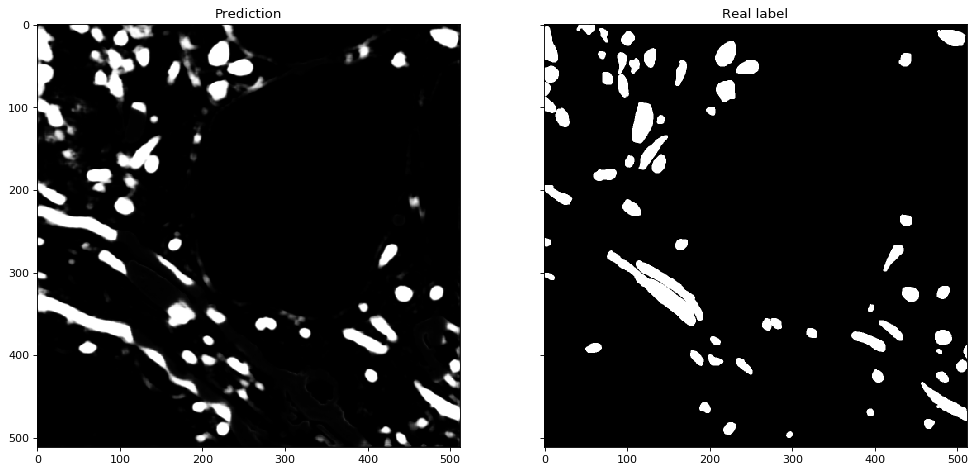

epoch: 25, train loss: 0.0740443754941225


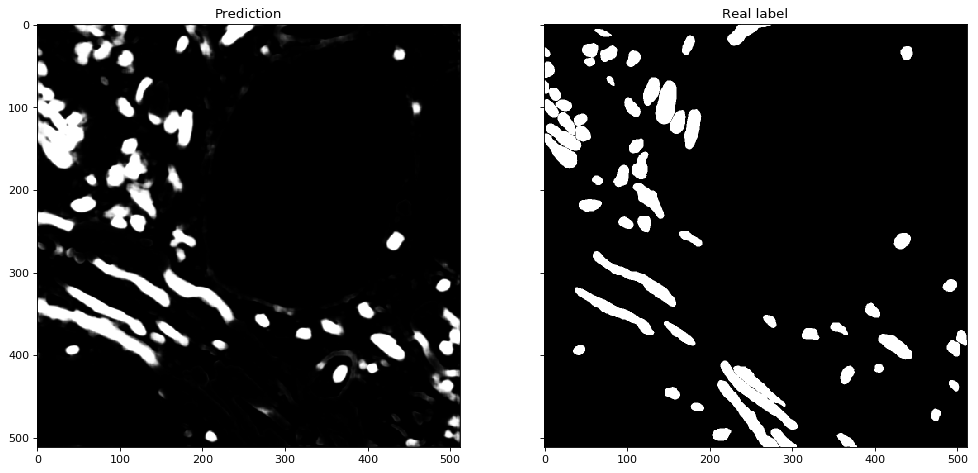

epoch: 26, train loss: 0.0724062331020832


epoch: 27, train loss: 0.06776339169591665


epoch: 28, train loss: 0.06580345649272204


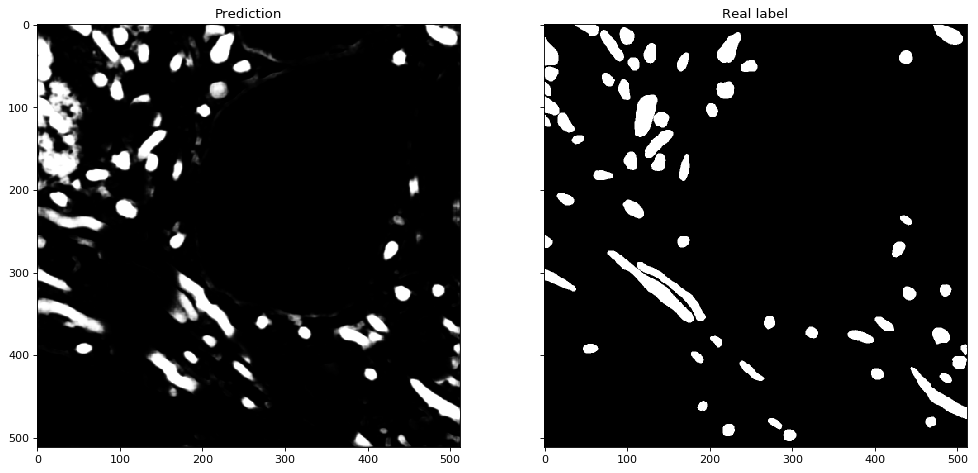

epoch: 29, train loss: 0.06418685223907232


epoch: 30, train loss: 0.06375740375369787


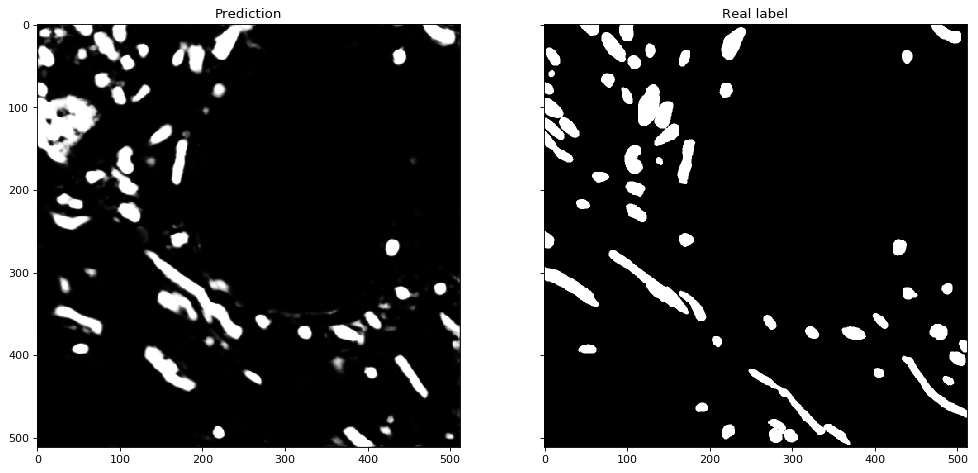

Network evaluation at epoch: 30 

train_avg_loss = 0.0664, train_avg_f1_score = 0.7929 
train_avg_precision = 0.6689, train_avg_recall = 0.9760 

val_avg_loss = 0.1961, val_avg_f1_score = 0.5785 
val_avg_precision = 0.4746, val_avg_recall = 0.7442 


epoch: 31, train loss: 0.06361943166702985


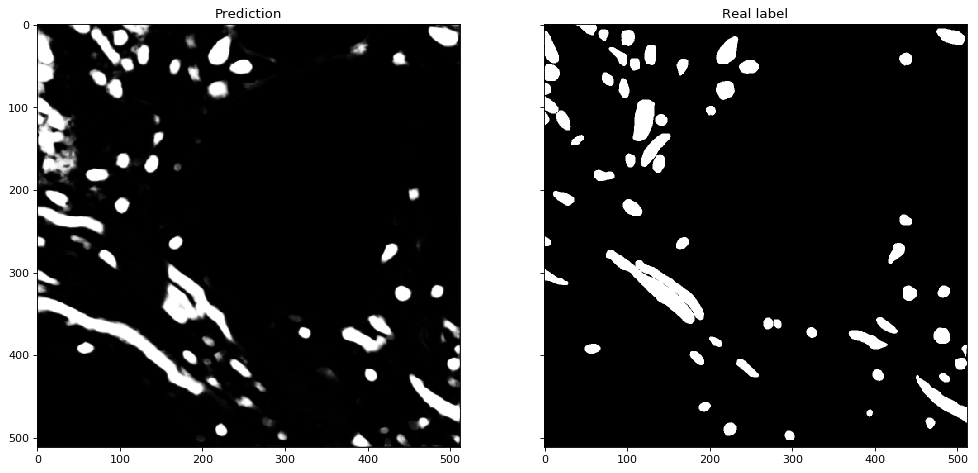

epoch: 32, train loss: 0.0645159414038062


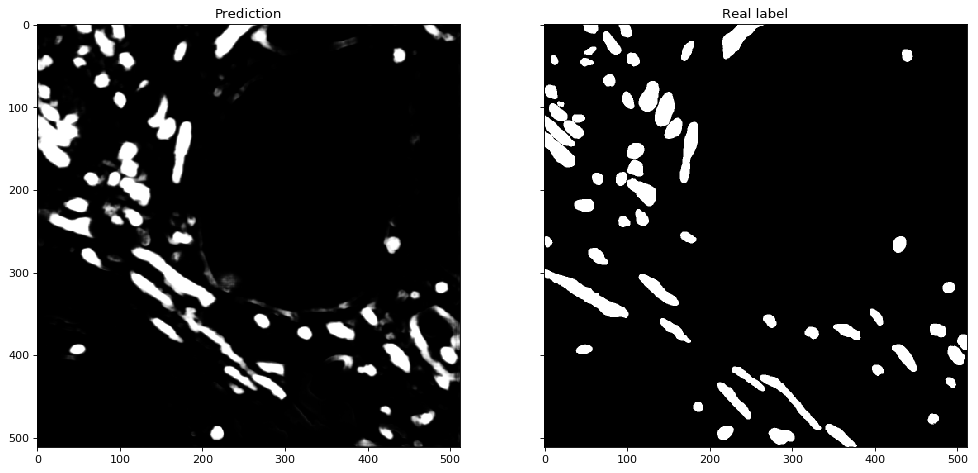

epoch: 33, train loss: 0.06416290625929832


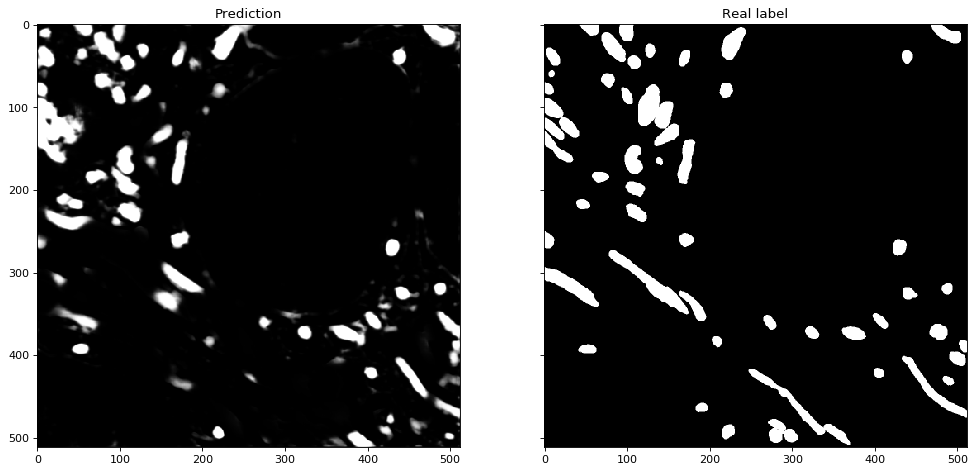

epoch: 34, train loss: 0.06379482969641685


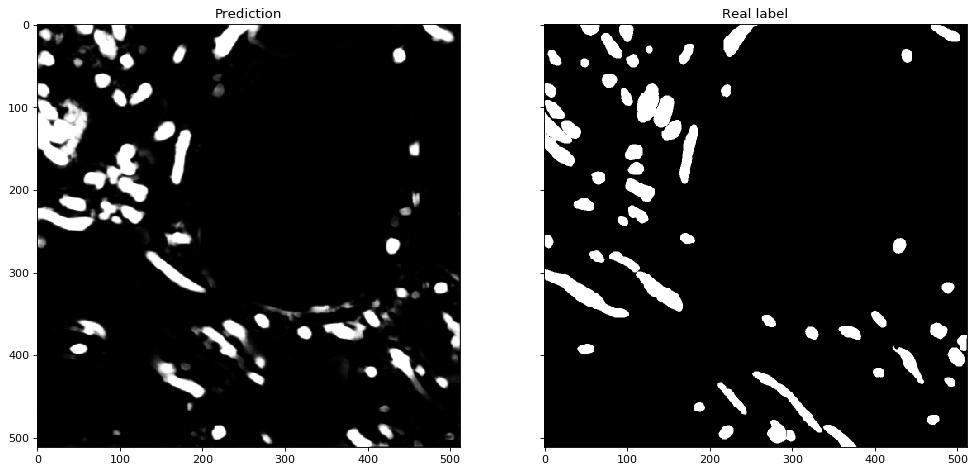

epoch: 35, train loss: 0.06269377712160348


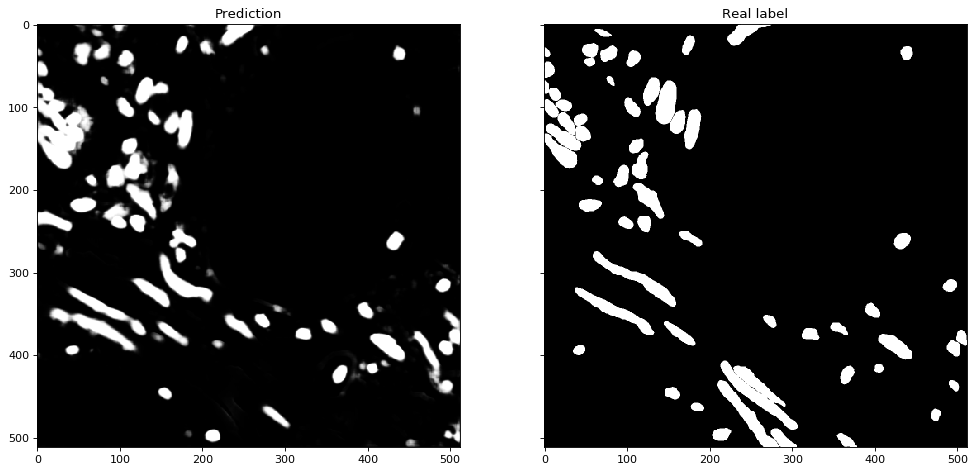

epoch: 36, train loss: 0.06005610153079033


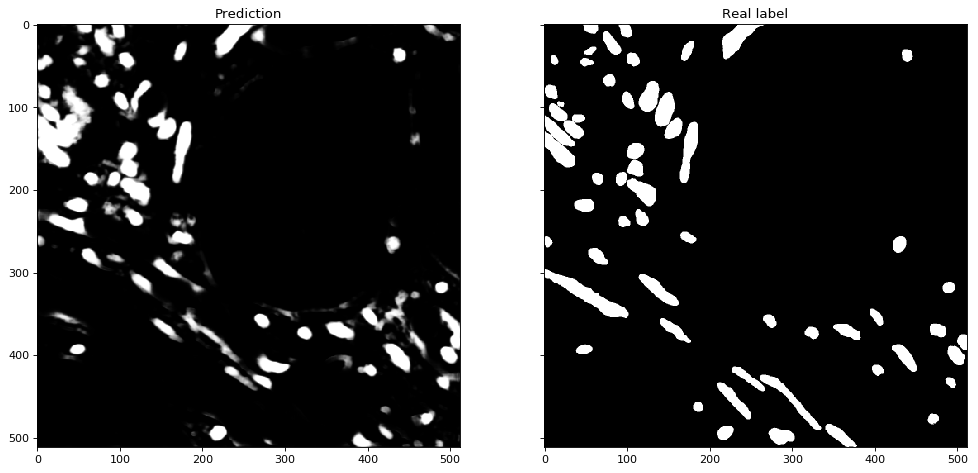

epoch: 37, train loss: 0.06023633927106857


epoch: 38, train loss: 0.06029991339892149


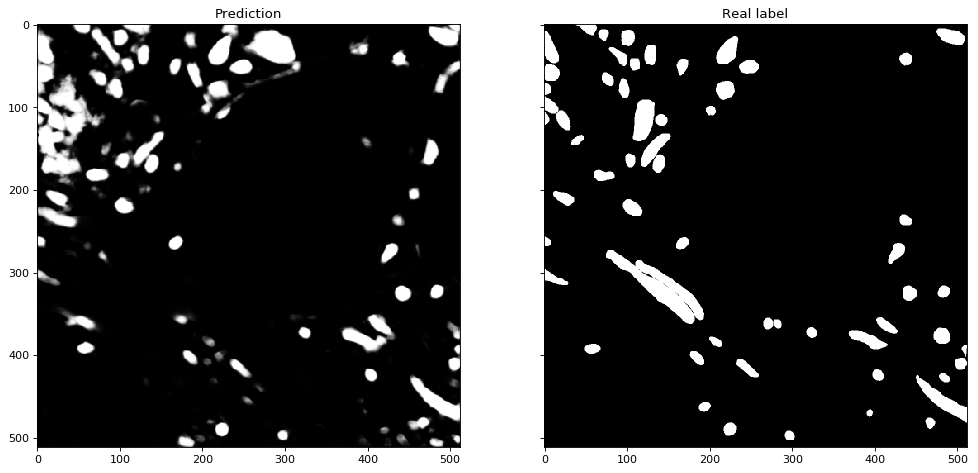

epoch: 39, train loss: 0.05946819931268692


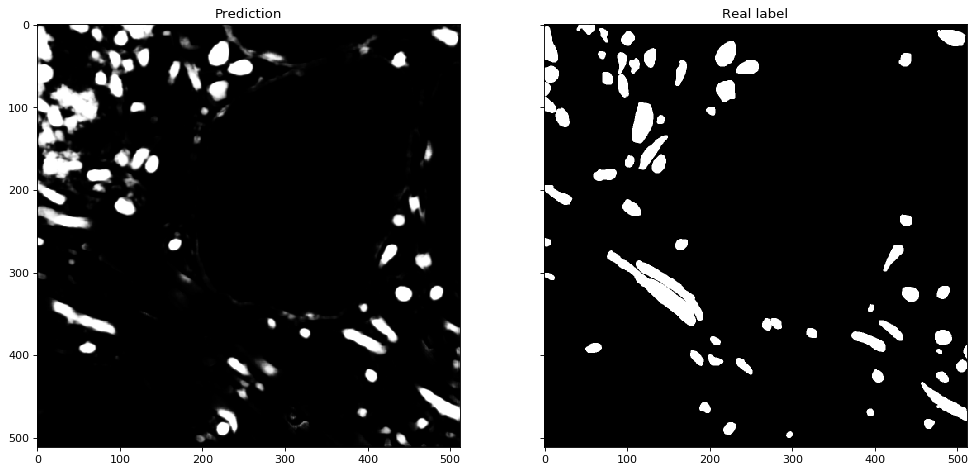

epoch: 40, train loss: 0.05877756103873253


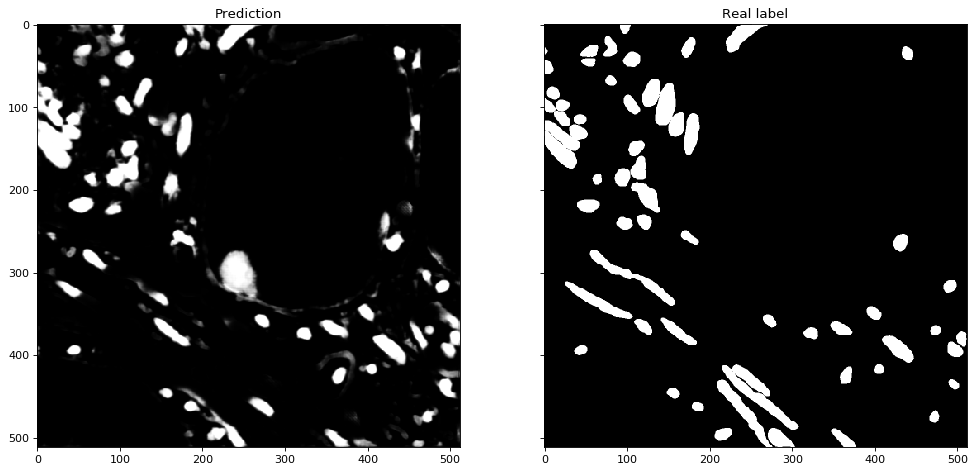

Network evaluation at epoch: 40 

train_avg_loss = 0.0697, train_avg_f1_score = 0.7664 
train_avg_precision = 0.6338, train_avg_recall = 0.9721 

val_avg_loss = 0.2215, val_avg_f1_score = 0.5234 
val_avg_precision = 0.4186, val_avg_recall = 0.7031 


epoch: 41, train loss: 0.06093592774122954


epoch: 42, train loss: 0.05773773640394211


epoch: 43, train loss: 0.05542446188628673


epoch: 44, train loss: 0.05510610770434141


epoch: 45, train loss: 0.05394603908061981


KeyboardInterrupt: 

In [3]:
# Prep GPU
GPU = torch.cuda.is_available()
print("GPU is {}enabled ".format(['not ', ''][GPU]))

batch_size = 1
n_epochs = 100

# unet(n_channels, n_classes, n_filters_start=64 )
un = unet(1,1)

if GPU: 
    un = un.cuda()

optimizer = torch.optim.Adam(un.parameters(), lr=0.01)
criterion = nn.BCELoss()

# training(model, inputs, targets,val,val_target, epochs)
training(GPU, un,mito_train_imgs, mito_train_lbls, mito_val_imgs, mito_val_lbls, optimizer, criterion, n_epochs, batch_size)

In [ ]:
whos

In [ ]:
import torch
print(torch.__version__)

# todo


1. accuracy

2. batches

3. disconnecting objects
